# Kernel Density Estimation

Iniciamos com as importações padrões.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

Embora existam várias versões de estimativa de densidade de kernel implementadas em Python (principalmente nos pacotes SciPy e StatsModels), prefiro usar a versão do Scikit-Learn
por causa de sua eficiência e flexibilidade. Ele é implementado no estimador `sklearn.neighbors.KernelDensity`, que manipula o KDE em várias dimensões com um de seis kernels e uma dúzia de métricas de distância. Como o KDE pode ser razoavelmente computacionalmente intensivo, o estimador Scikit-Learn usa um algoritmo baseado em árvore sob o capô e pode reduzir tempo de computação em troca da acurácia usando os parâmetros `atol` (tolerância absoluta) e `rtol` (tolerância relativa).

In [2]:
from sklearn.neighbors import KernelDensity

Vamos fazer uma estimativa para cada um dos 1440 minutos das 24 horas de cada dia da semana.

In [3]:
x_d = np.linspace(0, 24, 1441)

Foram preparados sete conjuntos de dados com as horas dos eventos `open` em arquivos textos, um para cada dia da semana. Para cada dia da semana, faremos a leitura do arquivo e a estimativa de densidade usando o kernel de Epanechnikov e largura de banda igual a 0.82 horas.

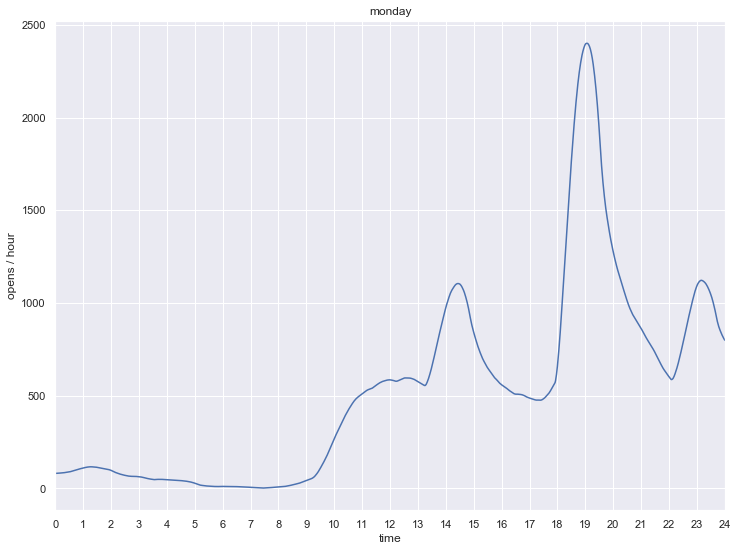

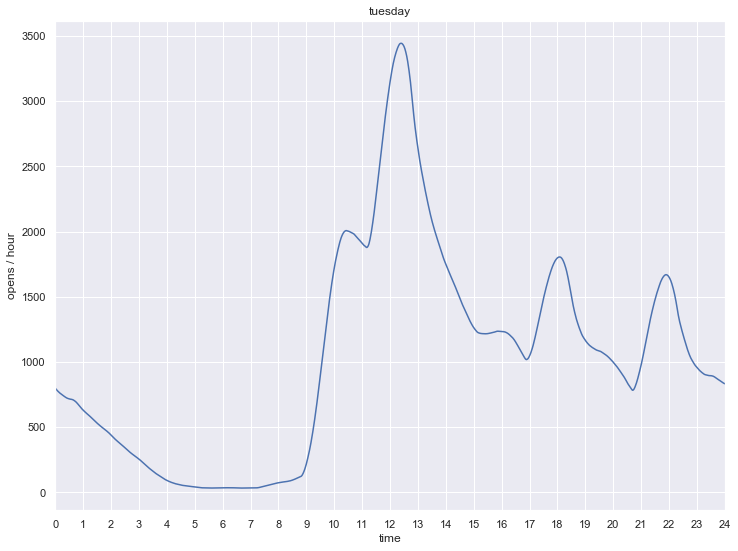

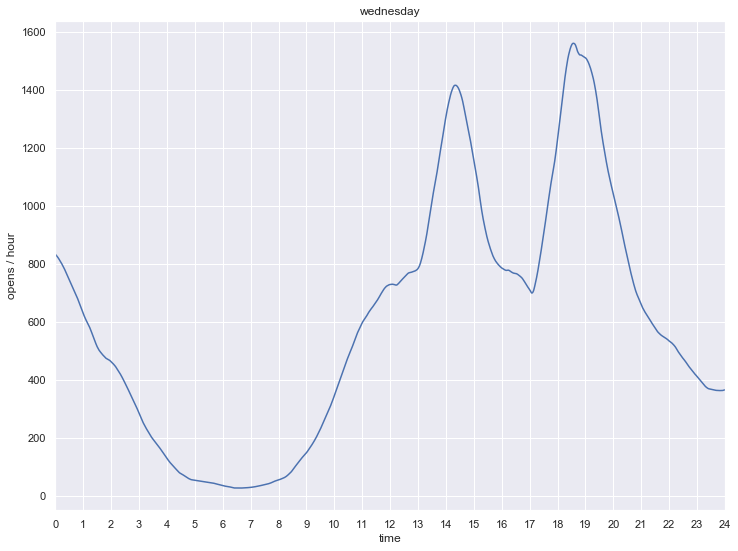

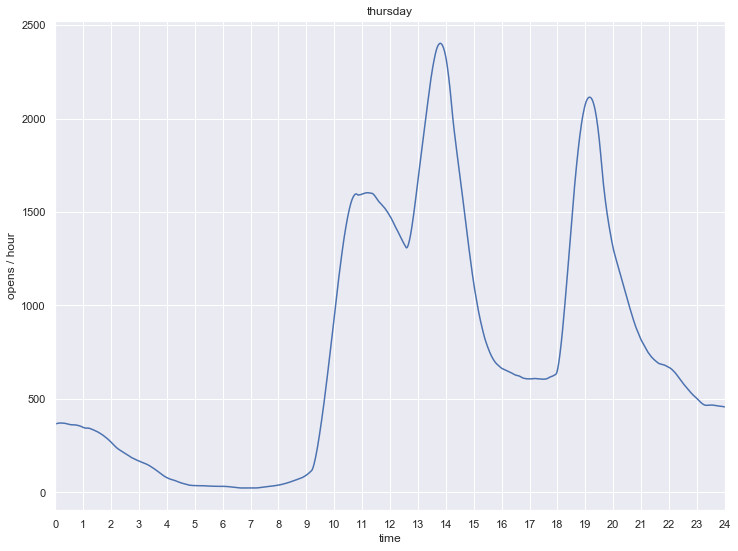

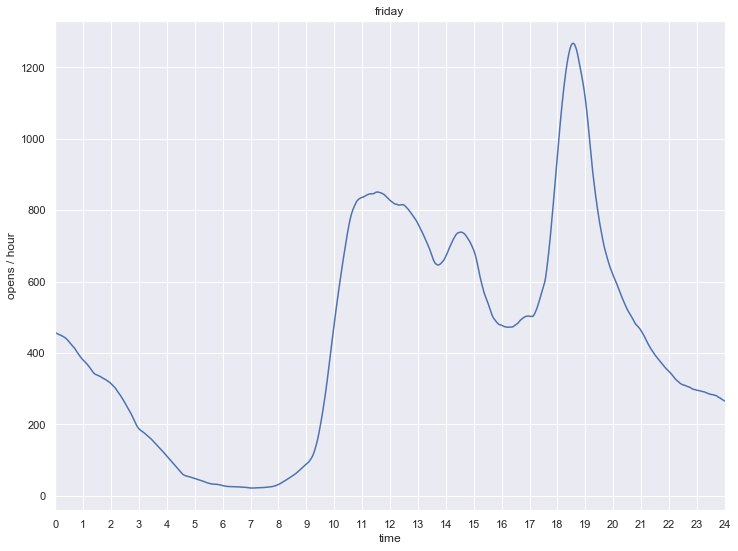

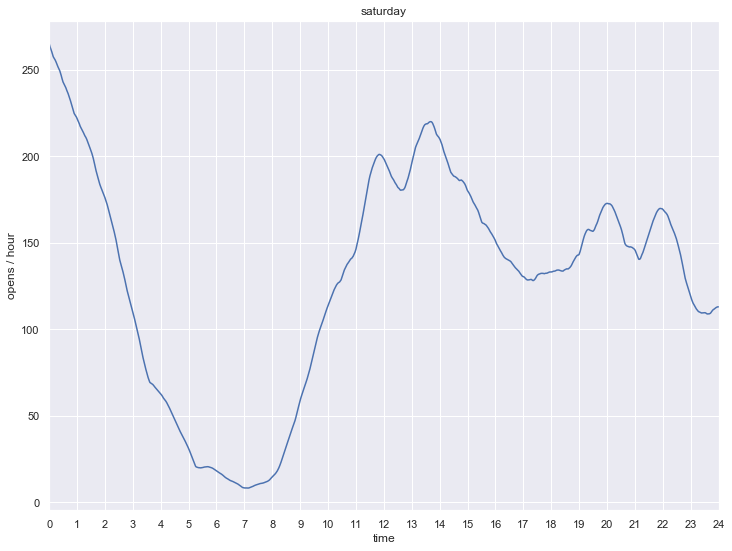

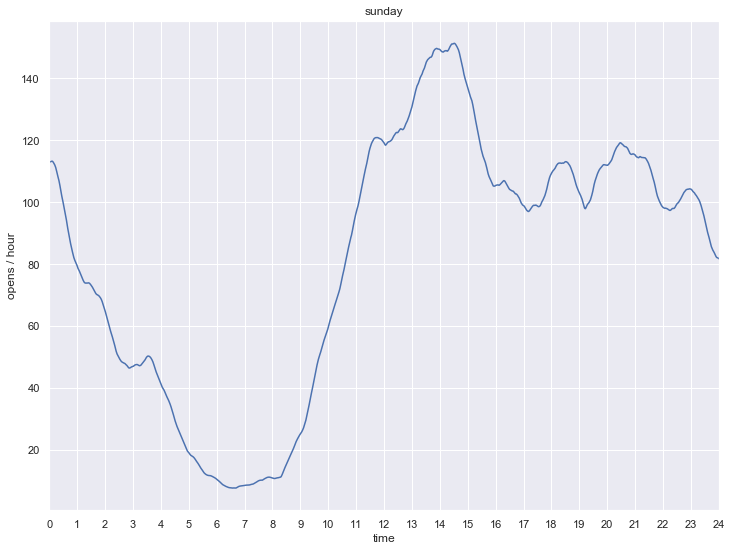

In [4]:
for day in ('monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'):
    table = pd.read_csv(day + '.csv')
    x = table['time'].values
    kde = KernelDensity(bandwidth=0.82, kernel='epanechnikov')
    kde.fit(x[:, None])
    logprob = kde.score_samples(x_d[:, None])
    y_d = np.exp(logprob)*x.size
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    ax.set(xlim=(0, 24), xlabel='time', ylabel='opens / hour', title=day)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.grid(which='major', axis='x', linestyle='-')
    ax.plot(x_d,  y_d)
    pde= pd.DataFrame(data={ 'time': x_d, 'density': y_d })
    pde.to_csv('pde_' + day + '.csv')